In [23]:
import cv2
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve

img = cv2.imread('C:/Users/ANSHIKA SHARMA/Downloads/time series labs/download (1).jpg')



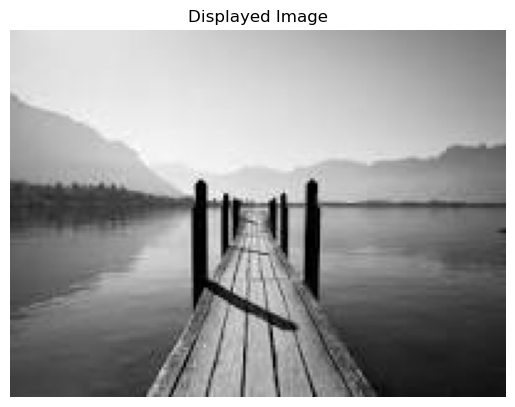

In [25]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Displayed Image')
plt.axis('off')
plt.show()



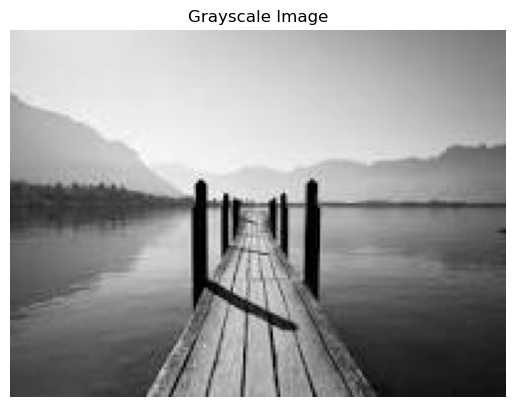

In [27]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


Image dimensions: 200x148
Total number of pixels: 29600


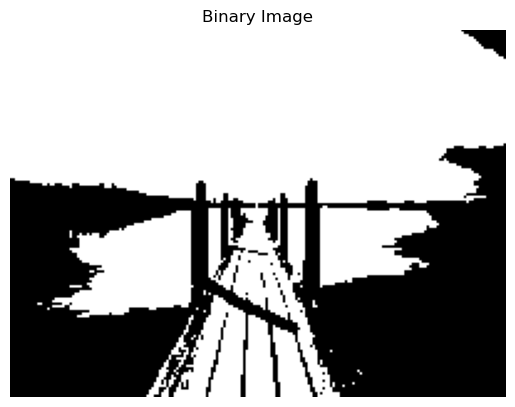

In [29]:
height, width = gray_img.shape
print(f"Image dimensions: {width}x{height}")

num_pixels = height * width
print(f"Total number of pixels: {num_pixels}")

_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()


In [31]:
black_pixel_count = np.sum(binary_img == 0)
print(f"Number of black pixels: {black_pixel_count}")


Number of black pixels: 11330


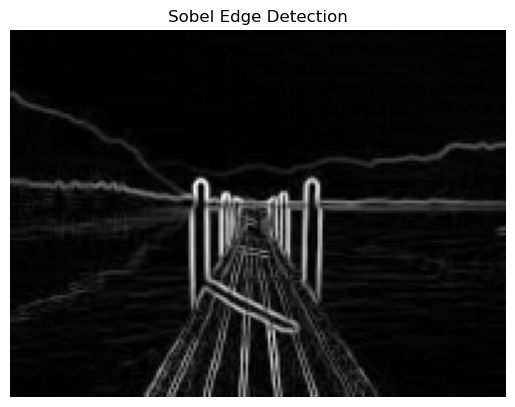

In [33]:
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.hypot(sobel_x, sobel_y)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()

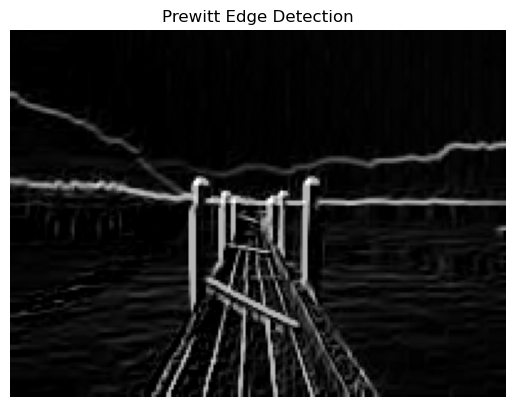

In [35]:
prewitt_x = cv2.filter2D(gray_img, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(gray_img, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_combined = np.hypot(prewitt_x, prewitt_y)
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()

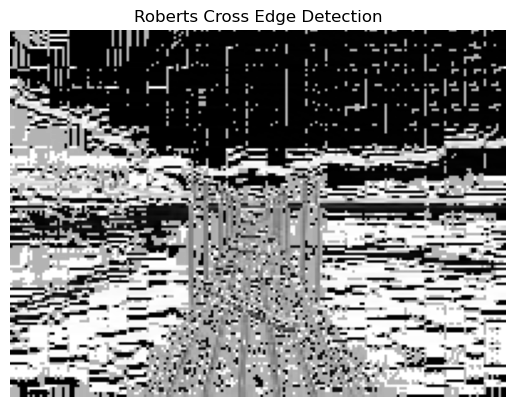

In [37]:
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])
roberts_x_edges = convolve(gray_img, roberts_x)
roberts_y_edges = convolve(gray_img, roberts_y)
roberts_combined = np.hypot(roberts_x_edges, roberts_y_edges)
plt.imshow(roberts_combined, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.axis('off')
plt.show()


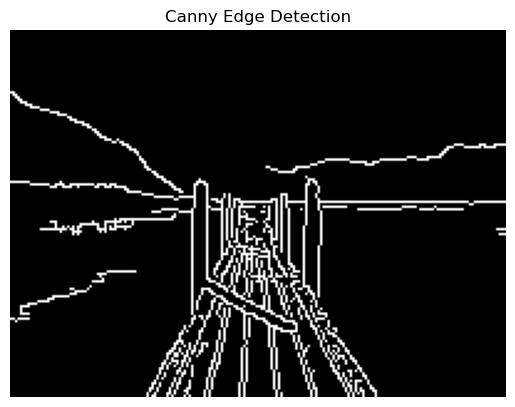

In [39]:
canny_edges = cv2.Canny(gray_img, 100, 200)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

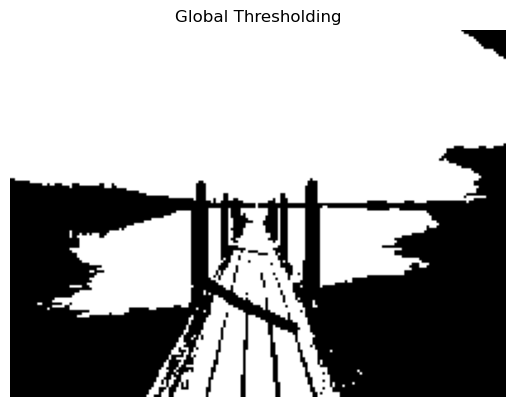

In [41]:
_, global_thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')
plt.show()

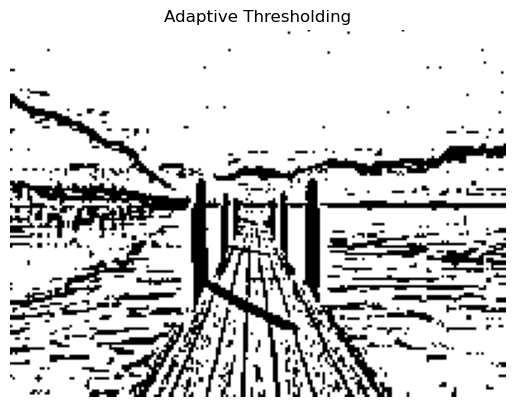

In [43]:
adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()


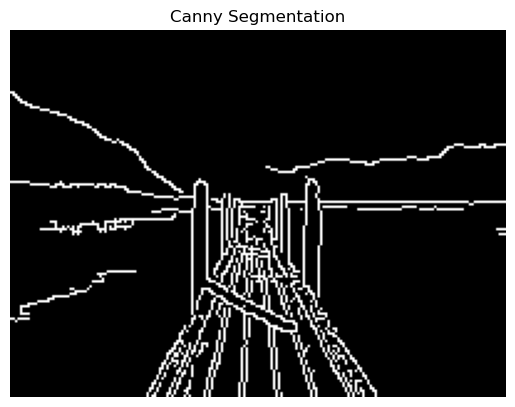

In [45]:
segmented_canny = cv2.Canny(gray_img, 100, 200)
plt.imshow(segmented_canny, cmap='gray')
plt.title('Canny Segmentation')
plt.axis('off')
plt.show()

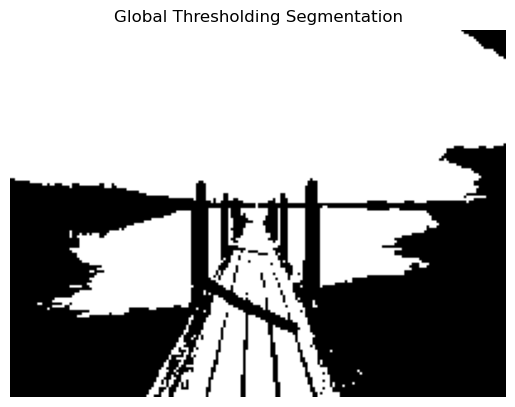

In [49]:
_, global_thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding Segmentation')
plt.axis('off')
plt.show()


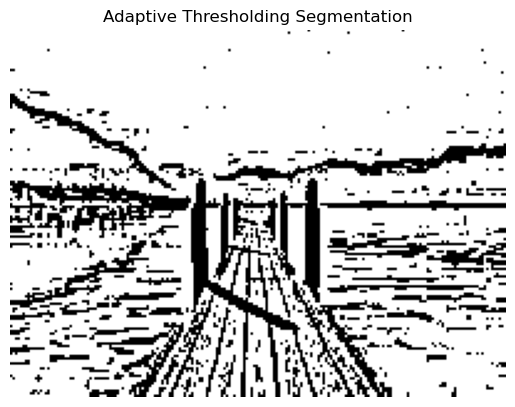

In [51]:
adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding Segmentation')
plt.axis('off')
plt.show()

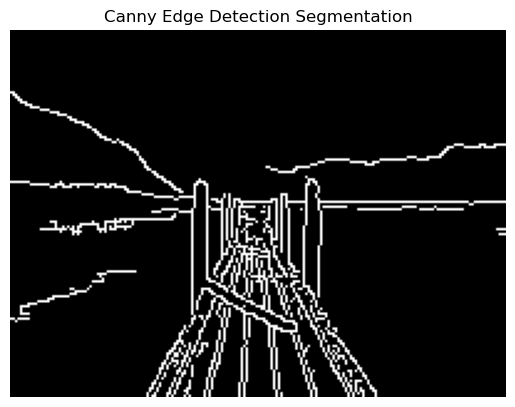

In [53]:
canny_edges = cv2.Canny(gray_img, 100, 200)

plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection Segmentation')
plt.axis('off')
plt.show()

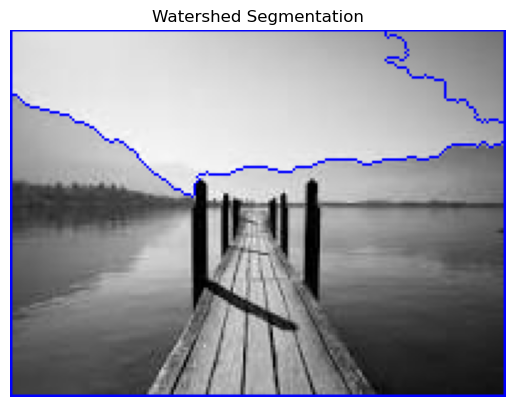

In [55]:
_, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()